# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание данных

**Признаки**

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**
- Exited — факт ухода клиента

## Подготовка данных

**Необходимые библиотеки:**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    f1_score, 
    roc_auc_score, 
    roc_curve,
    recall_score)
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

Для начала работы с данными необходимо сначала изучить информацию о дата сете.

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.shape

(10000, 14)

In [7]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Проверим есть ли в данных пропуски и сколько их.

In [8]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

В нашем датасете есть пропуски только в столбце Tenure (сколько лет человек является клиентом банка). В атрибуте пропущенна почти десятая часть значений, при этом данный признак может быть значительно важным при рассмотрении зависимости срока пребывания клиентом банка и отказом человека от услуг этого банка. Поэтому стоит уделить внимание обработке этих пропусков. Заменим данные пропуски медианным значением.

In [9]:
medians = data['Tenure'].median()
data['Tenure'] = data['Tenure'].fillna(medians)
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Так же проверим, есть ли в наших данных явные дубликаты

In [10]:
data.duplicated().sum()

0

Удалим некоторые столбцы, которые мы не сможем в дальнейшем использовать при машинном обучении и которые будут создавать нам помехи:RowNumber, CustomerId, Surname.

In [11]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

**Вывод**

Мы сделали подготовительный этап перед обучением модели:

- посмотрели какие данные хранятся в датасете.
- посмотрели тип хранимых данных.
- проверили данные на дубликаты и пропуски значений.

## Исследование задачи

Для оценки баланса классов проверим соотношение ушедших и оставшихся клиентов.

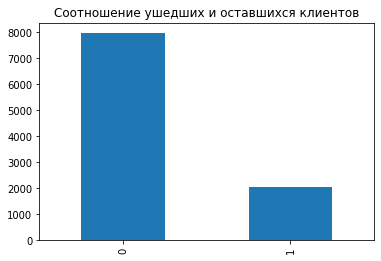

In [12]:
data['Exited'].value_counts().plot(kind='bar', title = 'Соотношение ушедших и оставшихся клиентов')
plt.show()

Распределение данных далеко от соотношения 1:1, преобладание оставшихся клиентов. По графику видно, что соотношение данных 1:4.

Для обучения модели приведем сначала все категориальные данные в числовые значения с помощью техники прямого кодирования - One-Hot Encoding. К категориальным признакам из дата сета у нас будут относится Географическое положение и Гендер. Чтобы избежать дамми-ловушки удалим первый столбец новых значений.

In [13]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [14]:
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Выделим признаки и целевой признак.

In [15]:
features = data_ohe.drop(['Exited'], axis = 1)
target = data_ohe['Exited']

Разделим данные на три части: на обучающую, валидационную и тестовую выборки в соотношении 60:20:20. И после проверим их размеры, чтобы убедиться, что все верно поделилось.

In [16]:
#Сначала отсекаем 60% данных для обучающей выборки.

features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                              test_size = 0.4, random_state = 12345)
#Теперь делим эту часть пополам.

features_valid,features_test, target_valid, target_test = train_test_split(features_valid, target_valid, 
                                                                              test_size = 0.5, random_state = 12345)

In [17]:
features.shape

(10000, 11)

In [18]:
#Размер обучающей выборки:
features_train.shape

(6000, 11)

In [19]:
#Размер валидационной выборки:
features_valid.shape

(2000, 11)

In [20]:
#Размер тестовой выборки:
features_test.shape

(2000, 11)

У признаков разный масштаб, что может привести к некорректному обучению модели, где какие-то признаки с большим диапазоном могут иметь больший вес, нежели признаки с меньшим диапазоном значений.

In [21]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Построим разные модели и посмотрим, какая из них лучше: Решающее дерево, Случайный лес, Логистическая регерссия.

### Решающее дерево

In [22]:
#Для дерева нам необходимо найти максимальную глубину для модели
max_depth = 0
max_model_tree = None
f1 = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(max_depth = depth, random_state = 12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    score = f1_score(target_valid, predictions)
    if score>f1:
        max_depth = depth
        max_model_tree = model
        f1 = score
print('Показатели лучшей модели: глубина деревьев:', max_depth, 'f1-мера', f1)   

Показатели лучшей модели: глубина деревьев: 6 f1-мера 0.5696969696969697


In [23]:
probabilities = max_model_tree.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

Площадь ROC-кривой: 0.5870780551015555


### Случайный лес

In [25]:
max_depth = 0
max_estimator = 0
f1 = 0
max_model_forest = None
for est in range(10, 151, 10):
    for depth in range(1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        score = f1_score(target_valid, predictions)
        if score>f1:
            max_depth = depth
            max_estimator = est
            max_model_forest = model
            f1 = score
        #print('Estimators:', est, 'depth:', depth, 'f1:', score)
        
print('Показатели лучшей модели: число деревьев:', max_estimator, 'глубина деревьев:', max_depth, 'f1-мера', f1)

Показатели лучшей модели: число деревьев: 90 глубина деревьев: 12 f1-мера 0.5896656534954408


In [26]:
probabilities = max_model_forest.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

Площадь ROC-кривой: 0.4573122032059049


### Логистическая регрессия

In [27]:
model_lr = LogisticRegression(random_state = 12345, solver='liblinear')
model_lr.fit(features_train, target_train)
predictions = model_lr.predict(features_valid)
score = f1_score(target_valid, predictions)
print('F1-мера при логистической регресии', score)

F1-мера при логистической регресии 0.33108108108108103


In [28]:
probabilities = model_lr.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

Площадь ROC-кривой: 0.501403706181344


**Вывод**

Мы посмотрели в каком состоянии у нас ноходится баланс классов - в датасете данных по клиентам, осташимся в компании намного больше, нежели по тем клиентам, кто ушел от компании.
Мы обучили модель с помощью трех разных алгоритмов и получили следующие результаты:
- Решающее дерево:
    Лучшее значение модели: 0.569 при глубине дерева 6.
- Случайный лес:
    Лучшее значение модели: 0.589 при 90 деревьях и глубине 12.
- Логистическая регрессия:
    Значение модели: 0.331
    
Лучший показатель F1-меры в итоге получился у случайного леса.

## Борьба с дисбалансом

Так как количество данных о клиентах, ушедших из банка меньше, чем о клиентах, оставшихся, необходимо решить проблему с дисбалансом классов. Применим следующие техники для наших моделей:

    - Взвешивание классов
    - Upsampling
    - Downsampling

### Взвешивание классов

#### Решающее дерево

In [29]:
#Для дерева нам необходимо найти максимальную глубину для модели
max_depth = 0
max_model_tree_v1 = None
f1 = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth = depth, random_state = 12345, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    score = f1_score(target_valid, predictions)
    if score>f1:
        max_depth = depth
        max_model_tree_v1 = model
        f1 = score
print('Показатели лучшей модели: глубина деревьев:', max_depth, 'f1-мера', f1)   

Показатели лучшей модели: глубина деревьев: 5 f1-мера 0.5963791267305644


In [30]:
probabilities = max_model_tree_v1.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

Площадь ROC-кривой: 0.615809828853144


При балансировке классов показатели модели немного улучшились: 
- стандартная модель: 0.569
- взвешивание классов: 0.596

#### Случайный лес

In [32]:
max_depth = 0
max_estimator = 0
f1 = 0
max_model_forest_v1 = None
for est in range(10, 100, 10):
    for depth in range(1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        score = f1_score(target_valid, predictions)
        if score>f1:
            max_depth = depth
            max_estimator = est
            max_model_forest_v1 = model
            f1 = score
        #print('Estimators:', est, 'depth:', depth, 'f1:', score)
        
print('Показатели лучшей модели: число деревьев:', max_estimator, 'глубина деревьев:', max_depth, 'f1-мера', f1)

Показатели лучшей модели: число деревьев: 90 глубина деревьев: 9 f1-мера 0.6298850574712643


In [33]:
probabilities = max_model_forest_v1.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

Площадь ROC-кривой: 0.4119884423731728


При балансировке классов показатели модели значительно улучшились: 
- стандартная модель: 0.589
- взвешивание классов: 0.628

#### Логистическая регрессия

In [34]:
model_lr_v1 = LogisticRegression(random_state = 12345, solver='liblinear', class_weight='balanced')
model_lr_v1.fit(features_train, target_train)
predictions = model.predict(features_valid)
score = f1_score(target_valid, predictions)
print('F1-мера при логистической регресии', score)

F1-мера при логистической регресии 0.5526717557251908


In [35]:
probabilities = model_lr_v1.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

Площадь ROC-кривой: 0.5017239464975192


А вот в логистической регресии по сравнению с прошлой моделью, показатель вырос значительно:
- стандартная модель: 0.331
- взвешивание классов: 0.571

### Upsampling

In [36]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

#### Решающее дерево

In [38]:
#Для дерева нам необходимо найти максимальную глубину для модели
max_depth = 0
max_model_tree_v2 = None
f1 = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth = depth, random_state = 12345)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    score = f1_score(target_valid, predictions)
    if score>f1:
        max_depth = depth
        max_model_tree_v2 = model
        f1 = score
print('Показатели лучшей модели: глубина деревьев:', max_depth, 'f1-мера', f1) 

Показатели лучшей модели: глубина деревьев: 5 f1-мера 0.5963791267305644


In [39]:
probabilities = max_model_tree_v2.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

Площадь ROC-кривой: 0.615809828853144


При балансировке классов показатели модели не изменились: 
- стандартная модель: 0.569
- взвешивание классов: 0.596
- upsampling: 0.596

#### Случайный лес

In [41]:
max_depth = 0
max_estimator = 0
f1 = 0
max_model_forest_v2 = None
for est in range(10, 100, 10):
    for depth in range(1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predictions = model.predict(features_valid)
        score = f1_score(target_valid, predictions)
        if score>f1:
            max_depth = depth
            max_estimator = est
            max_model_forest_v2 = model
            f1 = score
        #print('Estimators:', est, 'depth:', depth, 'f1:', score)
        
print('Показатели лучшей модели: число деревьев:', max_estimator, 'глубина деревьев:', max_depth, 'f1-мера', f1)

Показатели лучшей модели: число деревьев: 70 глубина деревьев: 9 f1-мера 0.6291179596174282


In [42]:
probabilities = max_model_forest_v2.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

Площадь ROC-кривой: 0.40984712616913616


При балансировке классов показатели модели почти не изменились: 
- стандартная модель: 0.589
- взвешивание классов: 0.628
- upsampling: 0.629

#### Логистическая регрессия

In [44]:
model_lr_v2 = LogisticRegression(random_state = 12345, solver='liblinear')
model_lr_v2.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_valid)
score = f1_score(target_valid, predictions)
print('F1-мера при логистической регресии', score)

F1-мера при логистической регресии 0.6054333764553688


In [45]:
probabilities = model_lr_v2.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

Площадь ROC-кривой: 0.5017239464975192


Показатель достаточно сильно изменился изменился:
- стандартная модель: 0.331
- взвешивание классов: 0.571
- upsampling: 0.605

### Downsampling

In [46]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

#### Решающее дерево

In [48]:
#Для дерева нам необходимо найти максимальную глубину для модели
max_depth = 0
max_model_tree_v3 = None
f1 = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth = depth, random_state = 12345)
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    score = f1_score(target_valid, predictions)
    if score>f1:
        max_depth = depth
        max_model_tree_v3 = model
        f1 = score
print('Показатели лучшей модели: глубина деревьев:', max_depth, 'f1-мера', f1) 

Показатели лучшей модели: глубина деревьев: 5 f1-мера 0.5943204868154158


In [49]:
probabilities = max_model_tree_v3.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

Площадь ROC-кривой: 0.5299779953073342


При балансировке классов показатель модели снизился: 
- стандартная модель: 0.569
- взвешивание классов: 0.596
- upsampling: 0.596
- downsample: 0.594

#### Случайный лес

In [51]:
max_depth = 0
max_estimator = 0
f1 = 0
max_model_forest_v3 = None
for est in range(10, 100, 10):
    for depth in range(1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predictions = model.predict(features_valid)
        score = f1_score(target_valid, predictions)
        if score>f1:
            max_depth = depth
            max_estimator = est
            max_model_forest_v3 = model
            f1 = score
        #print('Estimators:', est, 'depth:', depth, 'f1:', score)
        
print('Показатели лучшей модели: число деревьев:', max_estimator, 'глубина деревьев:', max_depth, 'f1-мера', f1)

Показатели лучшей модели: число деревьев: 10 глубина деревьев: 4 f1-мера 0.6092184368737475


In [52]:
probabilities = max_model_forest_v2.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

Площадь ROC-кривой: 0.40984712616913616


При балансировке классов показатели модели достаточно изменилась: 
- стандартная модель: 0.589
- взвешивание классов: 0.628
- upsampling: 0.629
- downsampling: 0.609

#### Логистическая регрессия

In [54]:
model_lr_v3 = LogisticRegression(random_state = 12345, solver='liblinear')
model_lr_v3.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_valid)
score = f1_score(target_valid, predictions)
print('F1-мера при логистической регресии', score)

F1-мера при логистической регресии 0.5746268656716417


In [55]:
probabilities = model_lr_v2.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))

Площадь ROC-кривой: 0.5017239464975192


Показатель немного изменился:
- стандартная модель: 0.331
- взвешивание классов: 0.571
- upsampling: 0.605
- downsampling: 0.574

**Вывод**

Мы проверили три техники балансировки классов и лучшие показатели у модели Случайного леса с балансом классов с помощью upwnsampling с показателями: 
- число деревьев: 70 
- глубина деревьев: 9 
- f1-мера 0.629

## Тестирование модели

Лучший показатель F1-меры показал алгоритм случайного леса с балансом классов с помощью upsampling с показателями:
- число деревьев: 70
- глубина деревьев: 9
- f1-мера 0.629

In [56]:
predictions = max_model_forest_v2.predict(features_test)
score = f1_score(target_test, predictions)
print('При числе деревьев 70 и глубине дерева 9 f1-мера достигает значения:', score)

При числе деревьев 70 и глубине дерева 9 f1-мера достигает значения: 0.6077003121748179


In [57]:
probabilities_test = max_model_forest_v2.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)
auc_roc

0.8531655550908374

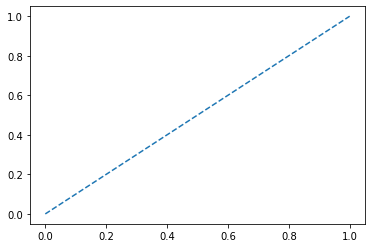

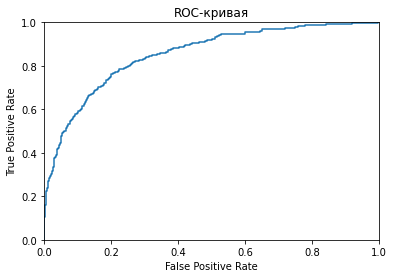

In [58]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

Посмотрим еще и на метрику recall, чтобы узнать какой процент объектов положительного класса верно предсказывает модель.

In [59]:
rscore = recall_score(target_test, predictions)
rscore

0.6903073286052009

**Вывод**

Мы рассмотрели модель с лучшими показателями и добились требуемого показателя f1-меры в 0,607. Если рассматривать полноту, то есть процент верно предсказанных положительных ответов, то модель достигает 69%. Можно считать, что модель случайного леса подходит для использования.

## Выводы

Перед нами стояла задача построить такую модель, котороя могла бы спрогнозировать на основании вводных данных уход клиента из банка. Для решения данной задачи мы провели над датасетом небольшую подготовительную работу, чтоб увеличить точность модели:
- Мы изучили находящиеся в датасете данные.
- Обработили пропуски значений.
- Удалили столбцы, которые не имели роли при обучении модели.
- Посмотрели баланс классов - соотношение ушедших и оставшихся клиентов.

При рассмотрении баланса классов, мы заметили, что данных по клиентам, оставшихся в банке гораздо больше, чем данных об ушедших клиентах, что могло стать помехой для корректного обучения модели. Для оценки качества модели мы использовали F1-меру для трех алгоритмов обучения: 
- Решающее дерево.
- Случайный лес.
- Логистическая регерессия.

Для сбалансированности классов мы применили три техники(взвешивание классов, Upsamled, Downsample) и получили следующие значения:

**Решающее дерево**
- стандартная модель: 0.569
- взвешивание классов: 0.596
- upsampling: 0.596
- downsample: 0.594

**Случайный лес**
- стандартная модель: 0.589
- взвешивание классов: 0.628
- upsampling: 0.629
- downsampling: 0.609

**Логистическая регрессия**
- стандартная модель: 0.331
- взвешивание классов: 0.571
- upsampling: 0.605
- downsampling: 0.574

Наилучший показатель после балансировки имеет алгоритм случайного леса к которому было применена техника upsampling. Так мы получили модель с показателем F1-меры показал алгоритм случайного леса с балансом классов с помощью downsampling с показателями:
- число деревьев: 70
- глубина деревьев: 9
- f1-мера 0.629

Модель на тестовой выборке дала значение f1-меры в 0.607, что чуть выше, чем показатель у стандартной модели. Если рассматривать полноту, то есть процент верно предсказанных положительных ответов, то модель достигает 69%. Показатель auc-roc решающего дерева составляет 0.853